In [ ]:
!pip install ultralytics
from IPython import display
display.clear_output()
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.59 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 30.1/78.2 GB disk)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import cv2
import os
import random
import pandas as pd
import matplotlib.image as mpimg
import seaborn as sns

%matplotlib inline

In [ ]:
import glob

data_dir = '/content/drive/MyDrive/dl/Tent_Detection/Tent.v1i.yolov8-obb'
train_dir = data_dir + '/train/images/'
test_dir = data_dir + '/test/images/'
valid_dir = data_dir + '/valid/images/'
print("Number of images in train dataset : ", len(os.listdir(train_dir)))
print("Number of images in test dataset : ", len(os.listdir(test_dir)))
print("Number of images in valid dataset : ", len(os.listdir(valid_dir)))

Number of images in train dataset :  456
Number of images in test dataset :  24
Number of images in valid dataset :  24


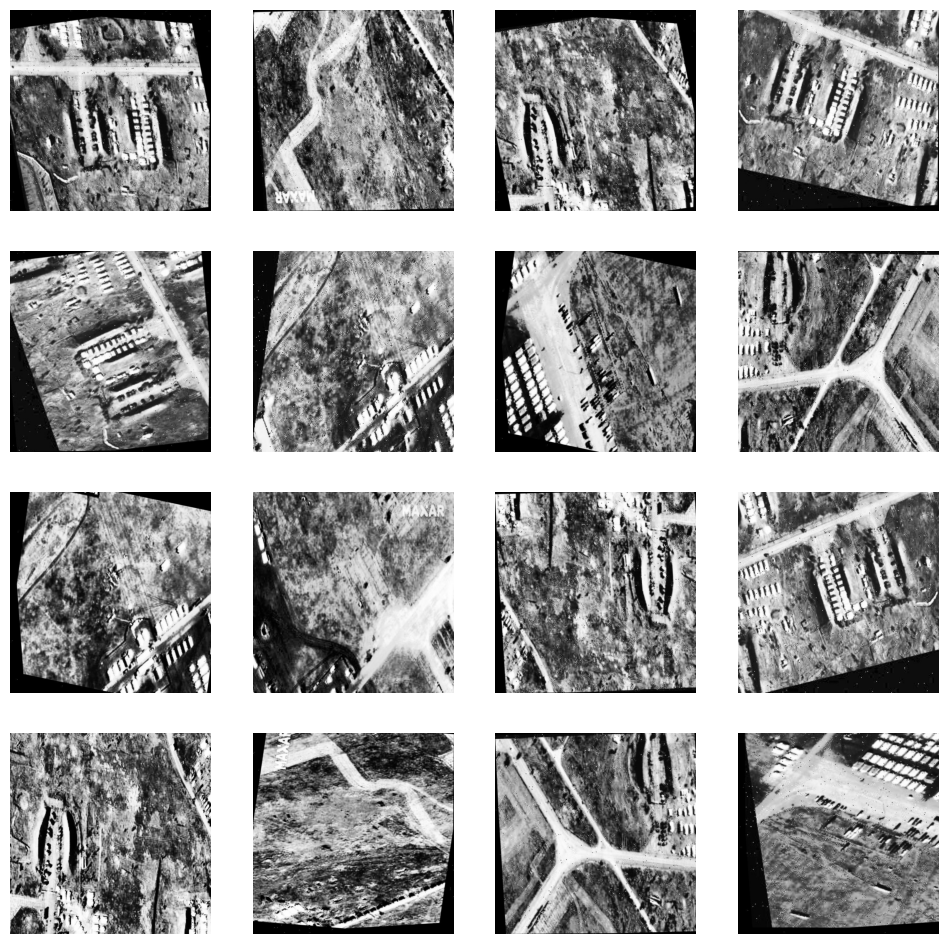

In [ ]:
# Visualizing the dataset images
import matplotlib.pyplot as plt
train_images = os.listdir(train_dir)
plt.figure(figsize=(12,12))
for i in range(16):
    plt.subplot(4,4,i+1)
    image = plt.imread(os.path.join(train_dir, train_images[i]))
    plt.imshow(image)
    plt.axis(False)

plt.show()

In [ ]:
# Preprocessing the image

def Preprocess(img):
  normalized_img = img.astype('float32')/255.0
  return normalized_img

In [ ]:
#Creating the model for Detection

def yolo_model():
  model = YOLO('yolov8x-obb.pt')
  return model

In [ ]:
model = yolo_model()

100%|██████████| 133M/133M [00:00<00:00, 267MB/s]


In [ ]:
results = model.train(data='/content/drive/MyDrive/dl/Tent_Detection/Tent.v1i.yolov8-obb/data.yaml',
                      epochs=30,
                      momentum=0.937,
                      weight_decay=0.0005,
                      imgsz=640,
                      batch=16,
                      freeze=10,
                      lr0=0.001,
                      workers=8)

Ultralytics YOLOv8.2.59 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=obb, mode=train, model=yolov8x-obb.pt, data=/content/drive/MyDrive/dl/Tent_Detection/Tent.v1i.yolov8-obb/data.yaml, epochs=30, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=10, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=Fa

train: Scanning /content/drive/MyDrive/dl/Tent_Detection/Tent.v1i.yolov8-obb/train/labels.cache... 456 images, 456 backgrounds, 0 corrupt: 100%|██████████| 456/456 [00:00<?, ?it/s]

WARNING ⚠️ No labels found in /content/drive/MyDrive/dl/Tent_Detection/Tent.v1i.yolov8-obb/train/labels.cache, training may not work correctly. See https://docs.ultralytics.com/datasets for dataset formatting guidance.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/drive/MyDrive/dl/Tent_Detection/Tent.v1i.yolov8-obb/valid/labels.cache... 24 images, 24 backgrounds, 0 corrupt: 100%|██████████| 24/24 [00:00<?, ?it/s]

WARNING ⚠️ No labels found in /content/drive/MyDrive/dl/Tent_Detection/Tent.v1i.yolov8-obb/valid/labels.cache, training may not work correctly. See https://docs.ultralytics.com/datasets for dataset formatting guidance.


Plotting labels to runs/obb/train2/labels.jpg... 
zero-size array to reduction operation maximum which has no identity
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.001' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 103 weight(decay=0.0), 113 weight(decay=0.0005), 112 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/obb/train2
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      7.25G          0      8.949          0          0        640: 100%|██████████| 29/29 [00:22<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.12it/s]

                   all         24          0          0          0          0          0
WARNING ⚠️ no labels found in obb set, can not compute metrics without labels



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30      6.65G          0      4.692          0          0        640:  45%|████▍     | 13/29 [00:09<00:12,  1.32it/s]


KeyboardInterrupt: 

In [ ]:
metrics=model.val(data="/content/drive/MyDrive/datasettent/data.yaml")
print(metrics)

Ultralytics YOLOv8.2.55 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)


val: Scanning /content/drive/MyDrive/datasettent/valid/labels.cache... 10 images, 0 backgrounds, 0 corrupt: 100%|██████████| 10/10 [00:00<?, ?it/s]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.30s/it]


                   all         10        336       0.93      0.815      0.918      0.655
Speed: 0.4ms preprocess, 86.2ms inference, 0.0ms loss, 3.1ms postprocess per image
Results saved to runs/obb/val2
ultralytics.utils.metrics.OBBMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7ef439009b40>
curves: []
curves_results: []
fitness: 0.6815693388921907
keys: ['metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)']
maps: array([     0.6553])
names: {0: 'tent'}
plot: True
results_dict: {'metrics/precision(B)': 0.9304863469610016, 'metrics/recall(B)': 0.8154761904761905, 'metrics/mAP50(B)': 0.9179717334907437, 'metrics/mAP50-95(B)': 0.6553024061590182, 'fitness': 0.6815693388921907}
save_dir: PosixPath('runs/obb/val2')
speed: {'preprocess': 0.41937828063964844, 'inference': 86.2433910369873, 'loss': 0.002288818359375, 'postprocess':

In [ ]:
# Extracting values
tp = metrics['tp']  # True Positives
tn = metrics['tn']  # True Negatives
fp = metrics['fp']  # False Positives
fn = metrics['fn']  # False Negatives

# 1. Accuracy: Overall correctness of the model
accuracy = (tp + tn) / (tp + tn + fp + fn)

# 2. Precision: Of the predicted positives, how many are actually positive?
precision = tp / (tp + fp) if (tp + fp) > 0 else 0

# 3. Recall (Sensitivity, True Positive Rate): Of all actual positives, how many were identified?
recall = tp / (tp + fn) if (tp + fn) > 0 else 0

# 4. False Positive Rate (FPR): Of all actual negatives, how many were incorrectly predicted as positive?
fpr = fp / (fp + tn) if (fp + tn) > 0 else 0

# 5. False Alarm Rate (FAR): Often synonymous with FPR, but can vary by context
far = fpr  # Modify if your context defines it differently

# Displaying the results
print("=== Evaluation Metrics ===")
print(f"True Positives (TP): {tp} – Correctly detected tents")
print(f"True Negatives (TN): {tn} – Correctly identified non-tent areas")
print(f"False Positives (FP): {fp} – Incorrectly detected tents where there are none")
print(f"False Negatives (FN): {fn} – Missed tents in the image")

print(f"\nAccuracy     : {accuracy:.4f} – Overall model correctness")
print(f"Precision    : {precision:.4f} – How many predicted tents are actual tents")
print(f"Recall       : {recall:.4f} – How many actual tents were detected")
print(f"FPR (False Positive Rate) : {fpr:.4f} – Proportion of non-tent areas misclassified as tents")
print(f"FAR (False Alarm Rate)    : {far:.4f} – Same as FPR in most cases")

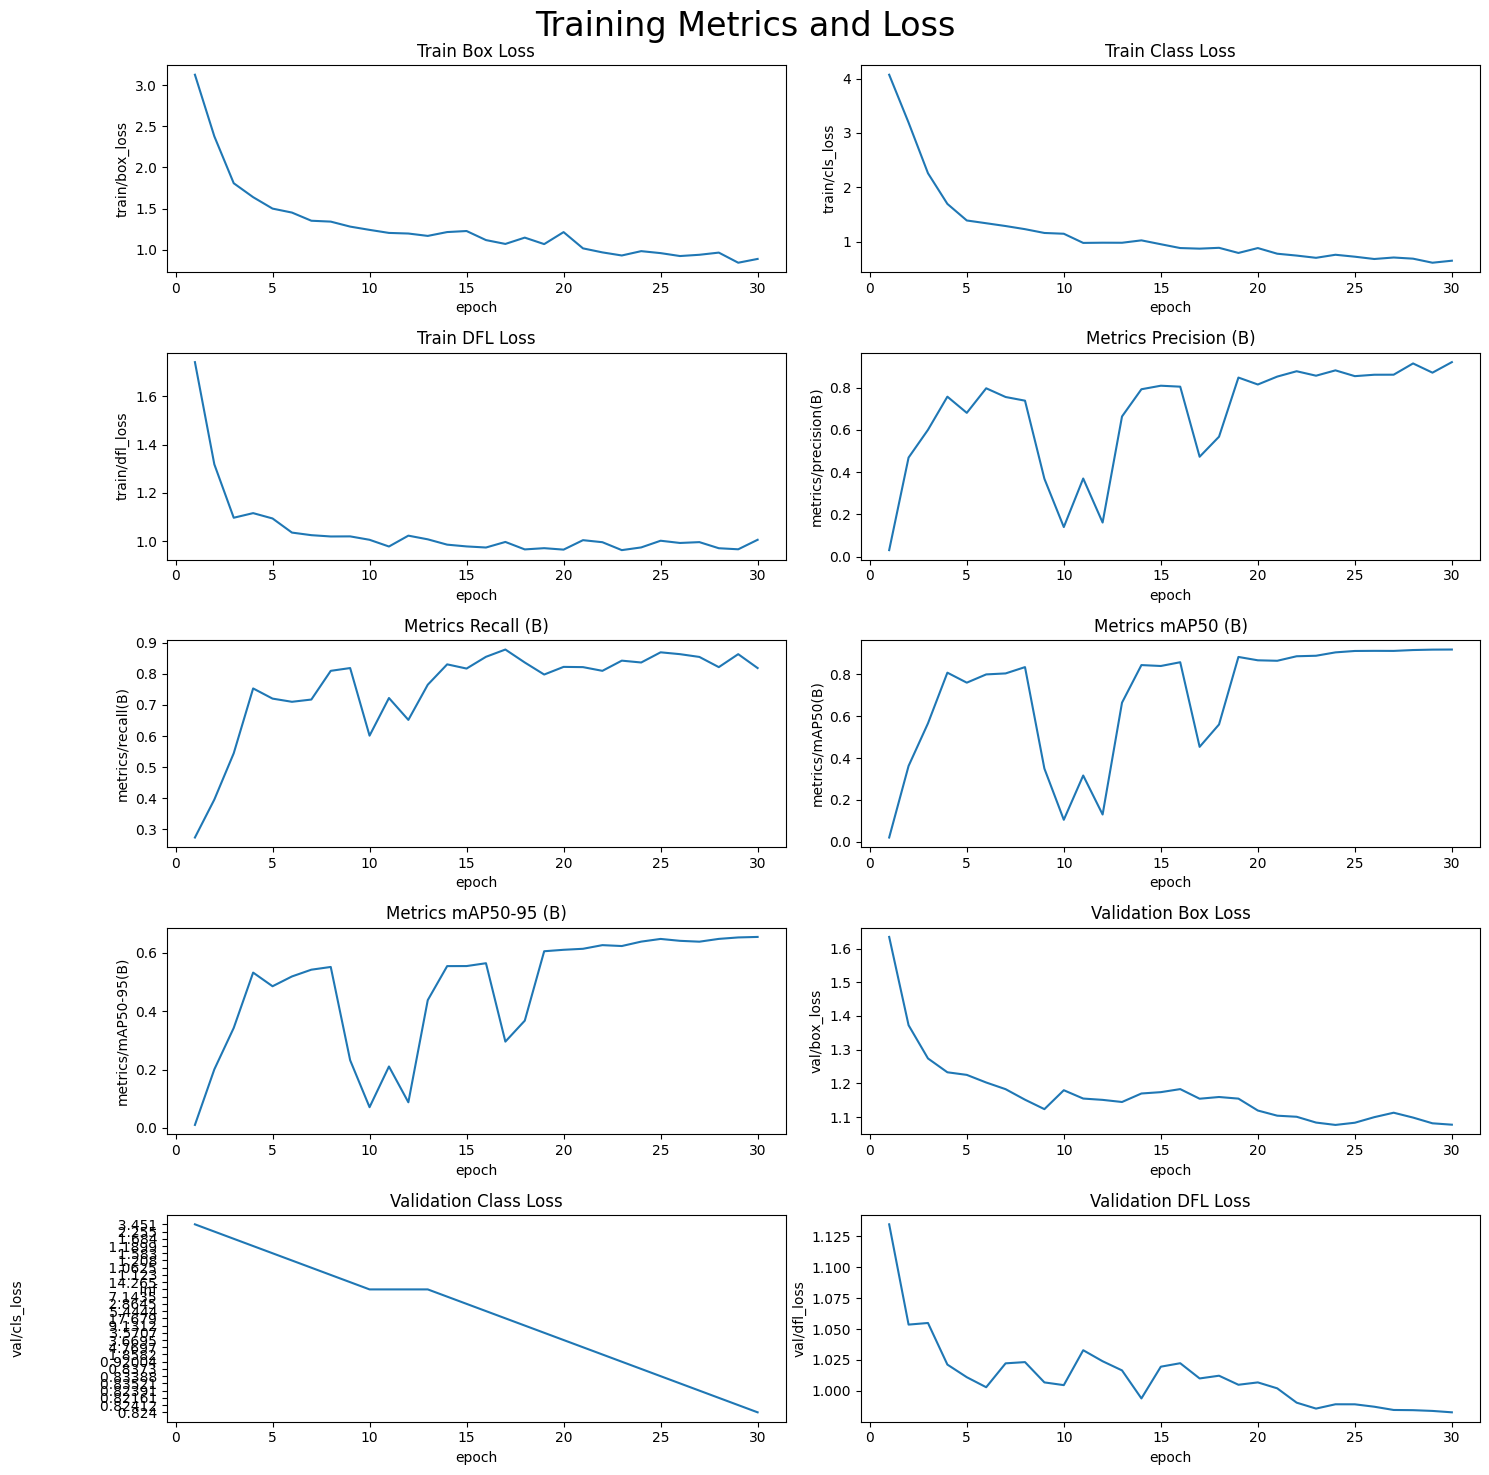

In [ ]:
%matplotlib inline
df = pd.read_csv('/content/runs/obb/train/results.csv')
df.columns = df.columns.str.strip()

fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(15, 15))

# plot the columns using seaborn

sns.lineplot(x='epoch', y='train/box_loss', data=df, ax=axs[0,0])
sns.lineplot(x='epoch', y='train/cls_loss', data=df, ax=axs[0,1])
sns.lineplot(x='epoch', y='train/dfl_loss', data=df, ax=axs[1,0])
sns.lineplot(x='epoch', y='metrics/precision(B)', data=df, ax=axs[1,1])
sns.lineplot(x='epoch', y='metrics/recall(B)', data=df, ax=axs[2,0])
sns.lineplot(x='epoch', y='metrics/mAP50(B)', data=df, ax=axs[2,1])
sns.lineplot(x='epoch', y='metrics/mAP50-95(B)', data=df, ax=axs[3,0])
sns.lineplot(x='epoch', y='val/box_loss', data=df, ax=axs[3,1])
sns.lineplot(x='epoch', y='val/cls_loss', data=df, ax=axs[4,0])
sns.lineplot(x='epoch', y='val/dfl_loss', data=df, ax=axs[4,1])

# set titles and axis labels for each subplot
axs[0,0].set(title='Train Box Loss')
axs[0,1].set(title='Train Class Loss')
axs[1,0].set(title='Train DFL Loss')
axs[1,1].set(title='Metrics Precision (B)')
axs[2,0].set(title='Metrics Recall (B)')
axs[2,1].set(title='Metrics mAP50 (B)')
axs[3,0].set(title='Metrics mAP50-95 (B)')
axs[3,1].set(title='Validation Box Loss')
axs[4,0].set(title='Validation Class Loss')
axs[4,1].set(title='Validation DFL Loss')

# add suptitle and subheader
plt.suptitle('Training Metrics and Loss', fontsize=24)

# adjust top margin to make space for suptitle
plt.subplots_adjust(top=0.8)

# adjust spacing between subplots
plt.tight_layout()

plt.show()

In [ ]:
%matplotlib inline
# Loading the best performing model
model = YOLO('/content/runs/obb/train/weights/best.pt')

# # Evaluating the model on the test dataset
metrics = model.val(conf = 0.25, split = 'test')

Ultralytics YOLOv8.2.55 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8x-obb summary (fused): 287 layers, 69,450,054 parameters, 0 gradients, 263.2 GFLOPs


val: Scanning /content/drive/MyDrive/datasettent/test/labels... 4 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4/4 [00:03<00:00,  1.03it/s]

val: New cache created: /content/drive/MyDrive/datasettent/test/labels.cache



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.89it/s]


                   all          4        108      0.615      0.148      0.384      0.247
Speed: 0.4ms preprocess, 103.9ms inference, 0.0ms loss, 2.4ms postprocess per image
Results saved to runs/obb/val


(-0.5, 2999.5, 2249.5, -0.5)

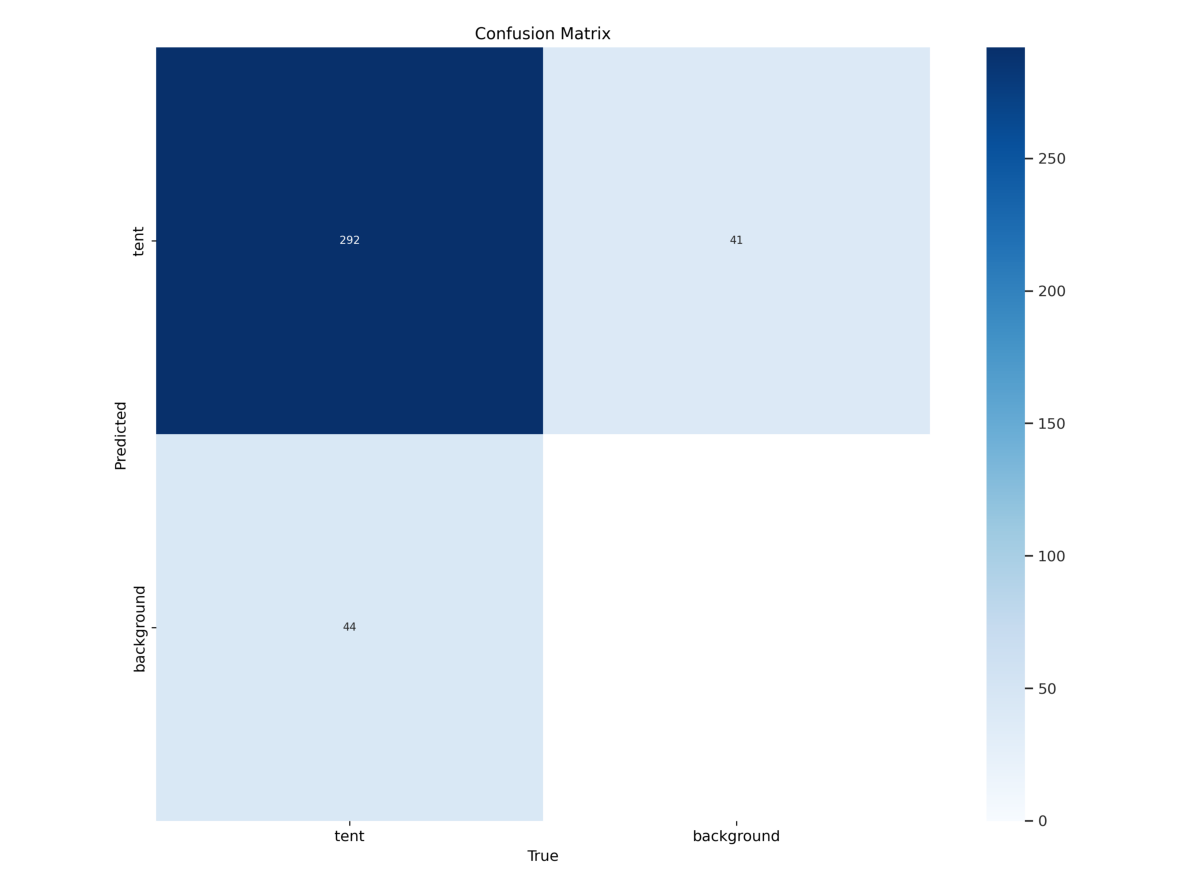

In [ ]:
%matplotlib inline
# Reading the confusion matrix image file
img = mpimg.imread('/content/runs/obb/train/confusion_matrix.png')

# Plotting the confusion matrix image
fig, ax = plt.subplots(figsize = (15, 15))

ax.imshow(img)
ax.axis('off')

In [ ]:
# Values from the confusion matrix
TP = 292 # True Positives
TN = 0  # True Negatives
FP = 44   # False Positives
FN = 41    # False Negatives

# Calculating precision
precision = TP / (TP + FP)

# Calculating accuracy
accuracy = (TP + TN) / (TP + TN + FP + FN)

print("Precision:", precision*100)
print("Accuracy:", accuracy*100)


Precision: 86.90476190476191
Accuracy: 77.45358090185677


In [ ]:
# Function to perform tent detections
def tent_detect(img):
    detect_result = model(img)
    detect_img = detect_result[0].plot()
    detect_img = cv2.cvtColor(detect_img, cv2.COLOR_BGR2RGB)

    return detect_img


0: 640x640 99.5ms
Speed: 1.7ms preprocess, 99.5ms inference, 2.9ms postprocess per image at shape (1, 3, 640, 640)


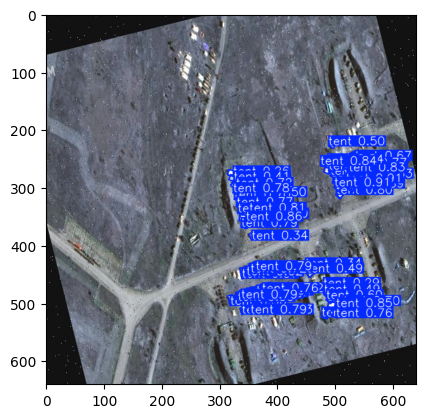

In [ ]:
img_path = '/content/drive/MyDrive/datasettent/train/images/original-1-_jpg.rf.a6ece6c1688f5fd1f5c4ab8d83109ec0.jpg'
img = plt.imread(img_path)
result = tent_detect(img)
plt.imshow(result)